<a href="https://colab.research.google.com/github/nisrinaam29/Bean-Classifier/blob/main/Bean_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bean Disease Classifier
For this preject i build a classifier for bean disease. The dataset based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. The goal is to build a neural network than can tell the difference between the healthy and diseased leaves.


In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
!gdown "https://storage.googleapis.com/learning-datasets/beans/train.zip" -O /tmp/train.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/validation.zip" -O /tmp/validation.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/test.zip" -O /tmp/test.zip

Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/train.zip
To: /tmp/train.zip
100% 144M/144M [00:01<00:00, 118MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/validation.zip
To: /tmp/validation.zip
100% 18.5M/18.5M [00:00<00:00, 112MB/s] 
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/test.zip
To: /tmp/test.zip
100% 17.7M/17.7M [00:00<00:00, 81.7MB/s]


In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import EarlyStopping
import random

In [ ]:
local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

PRE PROCESSING AND LOAD DATA TRAIN, TEST, VAL

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
      rescale=1./255
)
test_datagen = ImageDataGenerator(
      rescale=1./255
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train'
VAL_DIRECTORY_LOCATION = '/tmp/validation'
TEST_DIRECTORY_LOCATION = '/tmp/test' # the directory downloaded for /tmp/test has 4 subfolder
TARGET_SIZE = (224,224)
CLASS_MODE ='categorical'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)



Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


BUILD MODEL


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The third convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fourth convolution
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    Flatten(),
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    # There are 3 output neuron. It will contain 3 class, angular leaf spot, bean rust, healthy
    Dense(3, activation='softmax')
])

# This will print a summary of your model when you're done!
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

COMPILING THE MODEL

In [ ]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam'

model.compile(OPTIMIZER, LOSS_FUNCTION, metrics=['accuracy'])

MODEL TRAIN

In [ ]:
NUM_EPOCHS = 75
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(train_generator, epochs = NUM_EPOCHS, verbose = 1, validation_data = validation_generator, callbacks=early_stopping)

Epoch 1/75
9/9 [==============================] - 29s 3s/step - loss: 1.4812 - accuracy: 0.3250 - val_loss: 1.0921 - val_accuracy: 0.5113
Epoch 2/75
9/9 [==============================] - 21s 2s/step - loss: 1.0867 - accuracy: 0.3849 - val_loss: 1.0449 - val_accuracy: 0.5113
Epoch 3/75
9/9 [==============================] - 16s 2s/step - loss: 1.0664 - accuracy: 0.3936 - val_loss: 0.9917 - val_accuracy: 0.4211
Epoch 4/75
9/9 [==============================] - 16s 2s/step - loss: 0.9782 - accuracy: 0.5242 - val_loss: 0.8238 - val_accuracy: 0.6391
Epoch 5/75
9/9 [==============================] - 17s 2s/step - loss: 0.8599 - accuracy: 0.6190 - val_loss: 1.1073 - val_accuracy: 0.4511
Epoch 6/75
9/9 [==============================] - 16s 2s/step - loss: 0.9228 - accuracy: 0.5677 - val_loss: 0.7823 - val_accuracy: 0.6842
Epoch 7/75
9/9 [==============================] - 19s 2s/step - loss: 0.8575 - accuracy: 0.6354 - val_loss: 0.7816 - val_accuracy: 0.6541
Epoch 8/75
9/9 [==================

In [ ]:
modelPath = 'trainedModel'
model.save(modelPath)

MODEL PREDICTIONS

In [ ]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis = 1)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy : {test_accuracy}")
print(f"Test Loss : {test_loss}")

1/1 [==============================] - 1s 832ms/step - loss: 0.4694 - accuracy: 0.8438
Test Accuracy : 0.84375
Test Loss : 0.46935802698135376


In [ ]:
loadModel = tf.keras.models.load_model(modelPath)

In [ ]:
predictions = loadModel.predict(test_generator)
predicted_labels = np.argmax(predictions, axis = 1)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy : {test_accuracy}")
print(f"Test Loss : {test_loss}")

1/1 [==============================] - 1s 878ms/step - loss: 0.4694 - accuracy: 0.8438
Test Accuracy : 0.84375
Test Loss : 0.46935802698135376


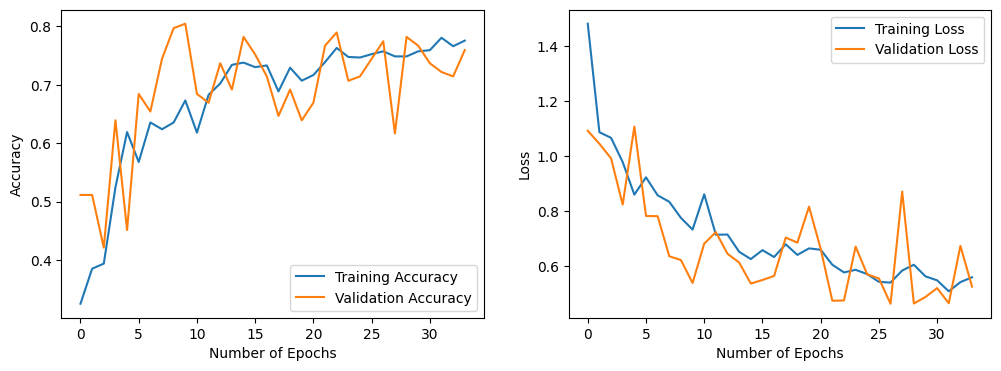

In [ ]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

4/4 [==============================] - 0s 22ms/step


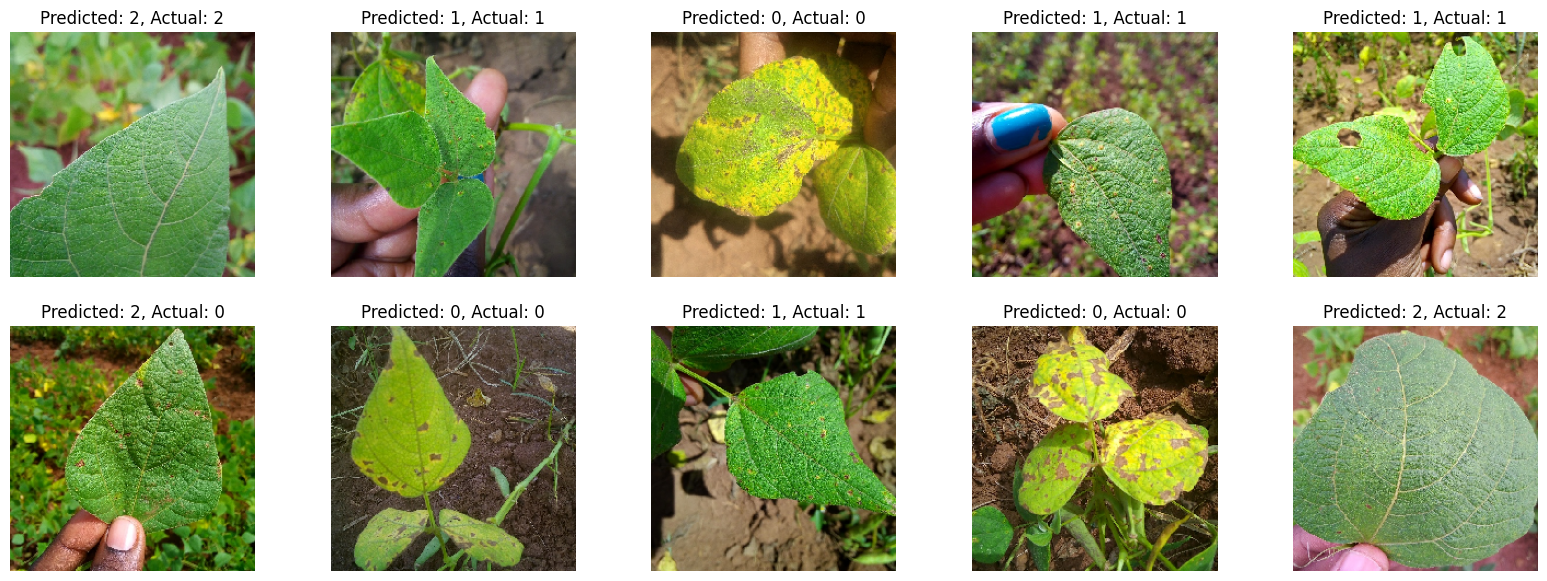

In [ ]:
# Get a batch of images and their corresponding labels from the test generator
test_images, test_labels = test_generator.next()

# Make predictions on the batch of images using the loaded model
predictions = loadModel.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

numSamples = 10
randomIndices = random.sample(range(len(test_images)), numSamples)

# Display the images along with their predicted labels
plt.figure(figsize=(20,7))
for i, val in enumerate(randomIndices):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[val])
    plt.title(f"Predicted: {predicted_labels[val]}, Actual: {np.argmax(test_labels[val])}")
    plt.axis('off')

# plt.tight_layout()
plt.show()